# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_analytics/WTYK/LC_04


## 1.) Get data for the stock TSLA (Tesla) from Yahoo Finance

In [2]:
# Retrieve the TESLA stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

df = yf.download('TSLA', start = "2022-01-01", end = today, progress=False)
df

Today is: 2025-10-07


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700
...,...,...,...,...,...
2025-09-30,444.720001,445.000000,433.119995,441.519989,74358000
2025-10-01,459.459991,462.290009,440.750000,443.799988,98122300


## 2.) Apply non-graphical Exploratory Data Analysis (EDA) methods

### a) What are the values for min, max. mean and median of the close price?

In [3]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,943.000000,943.000000,943.000000,943.000000,9.430000e+02
mean,255.748795,261.720039,249.730590,255.927777,1.056621e+08
std,70.757744,72.504628,69.088496,71.053630,3.901223e+07
min,108.099998,111.750000,101.809998,103.000000,3.716760e+07
25%,199.974998,203.685005,194.669998,199.665001,7.749835e+07
50%,246.529999,252.750000,241.009995,247.339996,9.809290e+07
75%,300.889999,308.786667,293.358322,300.735001,1.250550e+08
max,479.859985,488.540009,457.510010,475.899994,3.065906e+08


### b) What is the 10% Quantile and 90% quantile of close price?

In [4]:
df.quantile(q=[0.10, 0.90]).round(2)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0.1,174.78,178.19,171.82,174.64,62838260.0
0.9,349.42,357.99,342.30,350.75,160091120.0


## 3.) Apply graphical Exploratory Data Analysis (EDA) methods

### a) Plot a line chart of the close price

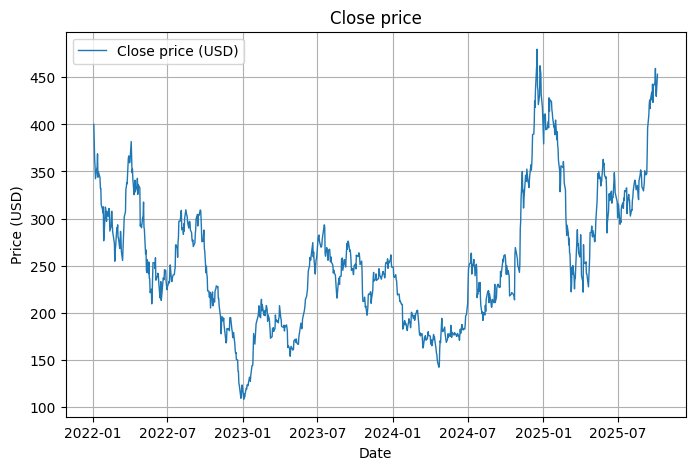

In [5]:
# Create the plot
plt.figure(figsize=(8, 5))

# Set the title and axis labels
plt.title('Close price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(df["Close"]["TSLA"], lw=1.0, label='Close price (USD)')

# Add a legend to the axis
plt.legend()

# Add grid
plt.grid()

plt.show()

### b) Plot a histogram of the close price

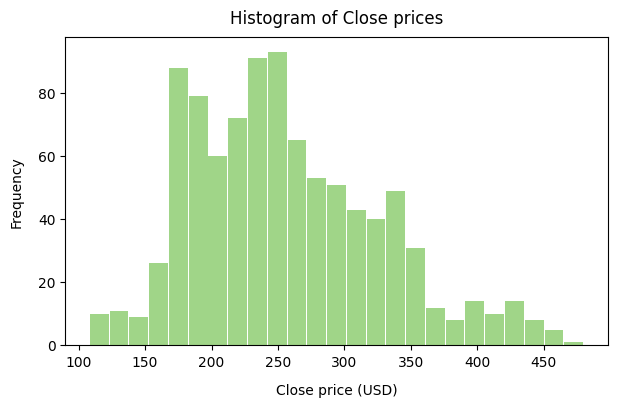

In [6]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

n, bins, patches = plt.hist(x=df['Close']['TSLA'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )

# Plot settings
plt.xlabel('Close price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of Close prices', fontsize=12, pad=10)

# Show plot
plt.show()

### c) Plot a boxplot of the close price

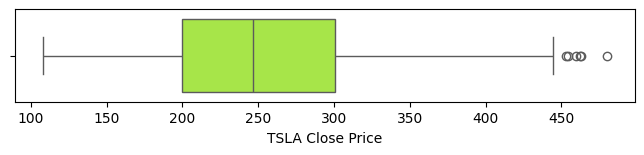

In [7]:
# Plot Boxplot
plt.figure(figsize=(8, 1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['Close']['TSLA'], color='greenyellow', orient='h')
plt.xlabel('TSLA Close Price')

# Show plot
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-10-07 06:34:06
Python Version: 3.11.13
-----------------------------------
